# TakeHomeExam Assignment1 Qn1

## Objectives
-Preprocess the data


-Develop classification highest accuracy value.




### Step 1: Import Libraries

In [2]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
print(tf.__version__)

1.14.0


Using TensorFlow backend.


### Step 2: Import Data

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

online_shoppers_dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv", sep=",")

online_shoppers_dataframe = online_shoppers_dataframe.reindex(
    np.random.permutation(online_shoppers_dataframe.index))

### Step 3: Preprocess

In [0]:
def preprocess_features(online_shoppers_dataframe):
  """Prepares input features from online shopper intention test data set.

  Args:
    online_shoppers_dataframe: A Pandas DataFrame expected to contain data
      from the online shopper intention test data set.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = online_shoppers_dataframe[
    ["Administrative",
     "Administrative_Duration",
     "Informational",
     "Informational_Duration",
     "ProductRelated",
     "ProductRelated_Duration",
     "BounceRates",
     "ExitRates",
     "PageValues",
     "SpecialDay",
    "Month",
    "OperatingSystems",
    "Browser",
     "Region",
     "TrafficType",
     "VisitorType",
     "Weekend"
     
    ]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(online_shoppers_dataframe):
  """Prepares target features (i.e., labels) from  online shoppers intention data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = online_shoppers_dataframe["Revenue"]
  return output_targets

**Train/Validation Split & Preprocessing**

All the the categorical columns are convered into binary dummy columns. All the numerical columns in different ranges are standarized for better performance of models.

In [5]:
def preprocessed_categorical_df(X,cat_list):
    for x in cat_list:
        dummies=pd.get_dummies(X[x],prefix=x,dummy_na=False)
        X=X.drop(x,1)
        X=pd.concat([X,dummies],axis=1)
    return X
  
def preprocessed_numerical_df(Y,num_list):
      scaler = StandardScaler().fit(Y[num_list].values)
      scaledf = scaler.transform(Y[num_list].values)
      Y = pd.DataFrame(scaledf, index=Y[num_list].index, columns=Y[num_list].columns)
      return Y

categorical_columns_list=["OperatingSystems", "Region","TrafficType","Month","VisitorType","Weekend"]
numerical_columns_list=[ "BounceRates","ExitRates","SpecialDay","Administrative_Duration","Informational_Duration","ProductRelated_Duration","PageValues"]

# Choose the first 8631( 70% of records) examples for training.
training_examples = preprocess_features(online_shoppers_dataframe.head(8631))
training_targets = preprocess_targets(online_shoppers_dataframe.head(8631))

training_examples_numerical=preprocessed_numerical_df(training_examples,numerical_columns_list)
training_examples_categorical=preprocessed_categorical_df(training_examples[categorical_columns_list],categorical_columns_list)
training_examples_no_preprocess=training_examples[["Administrative","Informational","ProductRelated","Browser"]]
training_examples=pd.concat([training_examples_no_preprocess,training_examples_numerical,training_examples_categorical], axis=1)

ordinal= OrdinalEncoder()
training_targets=pd.DataFrame(ordinal.fit_transform(training_targets.values.reshape(-1, 1)), index=training_targets.index,columns=['Revenue'])

# Choose the last 3669(30% of records) examples for validation.
validation_examples = preprocess_features(online_shoppers_dataframe.tail(3669))
validation_targets = preprocess_targets(online_shoppers_dataframe.tail(3669))

validation_examples_numerical=preprocessed_numerical_df(validation_examples,numerical_columns_list)
validation_examples_categorical=preprocessed_categorical_df(validation_examples[categorical_columns_list],categorical_columns_list)
validation_examples_no_preprocess=validation_examples[["Administrative","Informational","ProductRelated","Browser"]]
validation_examples=pd.concat([validation_examples_no_preprocess,validation_examples_numerical,validation_examples_categorical], axis=1)

validation_targets=pd.DataFrame(ordinal.fit_transform(validation_targets.values.reshape(-1, 1)), index=validation_targets.index,columns=['Revenue'])

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


Training examples summary:


,Administrative,Informational,ProductRelated,Browser,BounceRates,ExitRates,SpecialDay,Administrative_Duration,Informational_Duration,ProductRelated_Duration,PageValues,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0
mean,2.3,0.5,31.7,2.3,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.4,0.1,0.2,0.1,0.0,0.1,0.1,0.0,0.0,0.2,0.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.2,0.3,0.2,0.0,0.0,0.1,0.0,0.9,0.8,0.2
std,3.3,1.3,45.1,1.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,0.4,0.2,0.0,0.0,0.0,0.1,0.5,0.3,0.4,0.3,0.2,0.2,0.2,0.2,0.2,0.4,0.5,0.4,0.3,0.1,0.2,0.1,0.2,0.1,0.2,0.1,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.1,0.2,0.4,0.1,0.2,0.2,0.4,0.4,0.4,0.2,0.2,0.3,0.1,0.3,0.4,0.4
min,0.0,0.0,0.0,1.0,-0.5,-0.9,-0.3,-0.4,-0.2,-0.6,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,7.0,2.0,-0.5,-0.6,-0.3,-0.4,-0.2,-0.5,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
50%,1.0,0.0,18.0,2.0,-0.4,-0.4,-0.3,-0.4,-0.2,-0.3,-0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
75%,4.0,0.0,38.0,2.0,-0.1,0.1,-0.3,0.1,-0.2,0.1,-0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
max,27.0,24.0,705.0,13.0,3.6,3.2,4.8,18.6,17.8,31.6,16.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Validation examples summary:


,Administrative,Informational,ProductRelated,Browser,BounceRates,ExitRates,SpecialDay,Administrative_Duration,Informational_Duration,ProductRelated_Duration,PageValues,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0,3669.0
mean,2.4,0.5,31.9,2.4,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.4,0.1,0.2,0.1,0.0,0.1,0.1,0.0,0.0,0.2,0.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.3,0.2,0.0,0.0,0.1,0.0,0.9,0.8,0.2
std,3.4,1.2,43.0,1.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,0.4,0.2,0.0,0.0,0.0,0.1,0.5,0.3,0.4,0.3,0.2,0.2,0.2,0.2,0.2,0.4,0.5,0.4,0.3,0.1,0.2,0.1,0.2,0.1,0.2,0.2,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.1,0.2,0.2,0.3,0.4,0.4,0.2,0.2,0.4,0.1,0.4,0.4,0.4
min,0.0,0.0,0.0,1.0,-0.5,-0.9,-0.3,-0.5,-0.3,-0.7,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,7.0,2.0,-0.5,-0.6,-0.3,-0.5,-0.3,-0.6,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
50%,1.0,0.0,19.0,2.0,-0.4,-0.4,-0.3,-0.4,-0.3,-0.3,-0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
75%,4.0,0.0,38.0,2.0,-0.1,0.1,-0.3,0.1,-0.3,0.2,-0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
max,26.0,12.0,686.0,13.0,3.8,3.3,4.5,11.6,12.8,12.8,16.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Training targets summary:


,Revenue
count,8631.0
mean,0.1
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


Validation targets summary:


,Revenue
count,3669.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [0]:
print(training_examples.head())
print(training_targets.head())

      Administrative  Informational  ...  Weekend_False  Weekend_True
3566               0              0  ...              0             1
50                 0              0  ...              0             1
5378               0              0  ...              1             0
174                5              0  ...              0             1
9061               2              0  ...              1             0

[5 rows x 62 columns]
      Revenue
3566      0.0
50        0.0
5378      0.0
174       0.0
9061      0.0


### Step 4: Build Model

In [0]:
training_examples.shape

(8631, 62)

####Only change made to the entire notebook is in this section.
1.	Added 1 L2 regularization layer.
2.	Added 3 Dropout layers
3.	Used SGD optimizer instead RMSProp with learnig rate as 0.002 ,momentum=0.8 and clipnorm=1
4.	Reduced number of neurons in few of the existing neurons.
5.	Added few dense layers.
6.	Added batch_size=32 in the model.fit.


In [0]:
baseline_model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=tf.nn.relu),
    
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    
    keras.layers.Dropout(0.25),
 
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1,activation="sigmoid")
  ])

sgd = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8,clipnorm=1)

baseline_model.compile(loss='binary_crossentropy',
                optimizer=sgd,
                metrics=['accuracy'])


**Fit Model**

In [7]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 150
tf.set_random_seed(1)

# Store training stats
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,batch_size=32,
                    callbacks=[PrintDot()])




....................................................................................................
..................................................

**Baseline Accuracy of Validation Data**

In [0]:
print(validation_targets['Revenue'].value_counts().sort_values(ascending=False).head())
Baseline_accuracy=3043/(3043+626)
print("Baseline_accuracy:",Baseline_accuracy)

0.0    3043
1.0     626
Name: Revenue, dtype: int64
Baseline_accuracy: 0.8293813028073045


**Lowest Validation Accuracy of the model**

In [8]:
print("baseline model maximum accuracy:",max(b_history.history['val_acc']))
print("baseline model minimum accuracy:",min(b_history.history['val_acc']))

baseline model maximum accuracy: 0.8877078
baseline model minimum accuracy: 0.8094849


By comparing the baseline accuracy with accuracy obtained from the baseline DNN model, the accuracy obtained from the model is more.



### Step 5: Plot Results







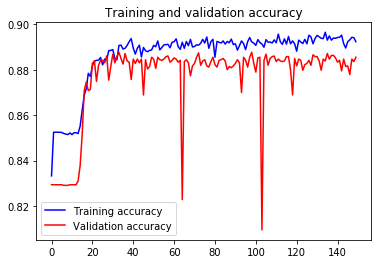

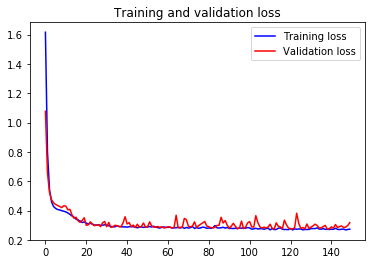

In [9]:
acc = b_history.history['acc']
val_acc = b_history.history['val_acc']
loss = b_history.history['loss']
val_loss = b_history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

The above graphs shows the variation of accurancy and loss with the increase of number of epochs. We can observe that accuracy obtained from baseline model is better when compared to that of L2 regularization model.